In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Fetch the database 
path = 'Rich_Global_Condom_Usage_Dataset-Clean_2.csv'
df = pd.read_csv (path)

df.head()


,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male Purchases (%),Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69%,39%,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50%,33%,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46%,54%,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49%,57%,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40%,29%,Trojan,Yes


In [ ]:
# Supprimer le symbole % et les espaces avant de convertir en float
df['Male Purchases (%)'] = df[' Male Purchases (%)'].str.strip().str.rstrip('%').astype(float)
df[' Female Purchases (%) '] = df[' Female Purchases (%) '].str.strip().str.rstrip('%').astype(float)

In [ ]:
# Rajouter une colonne continent

africa = ['South Africa']

europe = ['Germany', 'UK' , 'France'] 

asia = ['India', 'China', 'Japan'] 

north_america = ['USA']

south_america = ['Brazil']

oceania = ['Australia']

Continent = []

for pays in df['Country']:
    if pays in europe :
        Continent.append ('Europe')
    elif pays in asia :
        Continent.append ('Asia')
    elif pays in north_america :
        Continent.append ('North America')
    elif pays in south_america :
        Continent.append ('South America')
    elif pays in oceania :
        Continent.append ('Oceania')
    elif pays in africa :
        Continent.append ('Africa')

df['Continent'] = Continent

In [4]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 1000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', ' Male Purchases (%)',
       ' Female Purchases (%) ', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Continent'],
      dtype='object')

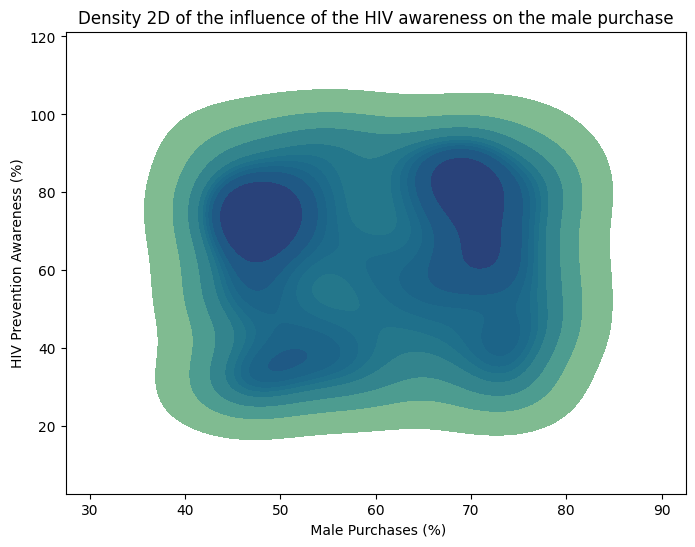

In [ ]:
# Création du graphique de densité 2D
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=df['Male Purchases (%)'],
    y=df['HIV Prevention Awareness (%)'],
    fill=True,
    cmap="cr",
    thresh=0.05
)

# Labels et titre
plt.xlabel(" Male Purchases (%)")
plt.ylabel("HIV Prevention Awareness (%)")
plt.title("Density 2D of the influence of the HIV awareness on the male purchase")

# Affichage du graphique
plt.show()


In [21]:
grouped_data['Country'].head()

0    Australia
1       Brazil
2        China
3       France
4      Germany
Name: Country, dtype: object

In [56]:
print(df[' Female Purchases (%) '].mean)
print(df['Male Purchases (%)'].mean)

<bound method Series.mean of 0      39.0
1      33.0
2      54.0
3      57.0
4      29.0
       ... 
545    60.0
546    41.0
547    59.0
548    31.0
549    47.0
Name:  Female Purchases (%) , Length: 550, dtype: float64>
<bound method Series.mean of 0      69.0
1      50.0
2      46.0
3      49.0
4      40.0
       ... 
545    52.0
546    62.0
547    45.0
548    72.0
549    40.0
Name: Male Purchases (%), Length: 550, dtype: float64>


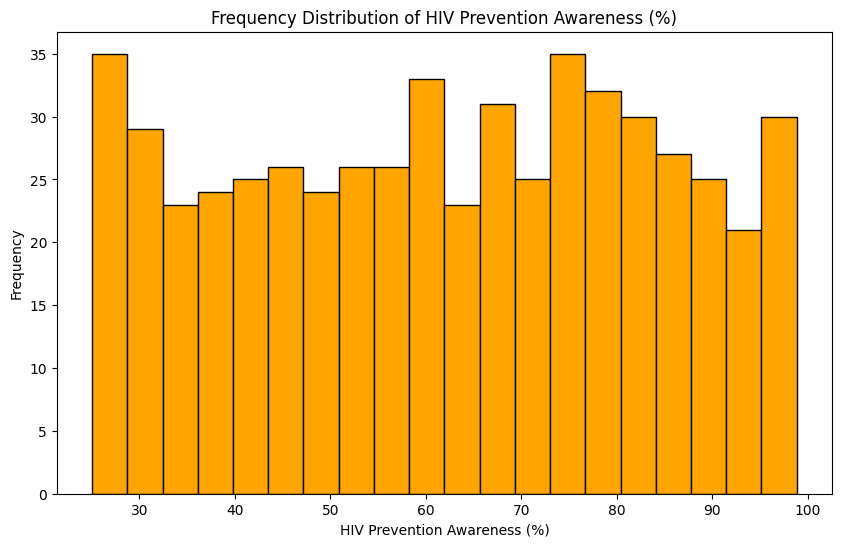

In [12]:
# Création d'un histogramme pour la fréquence de "HIV Prevention Awareness (%)"
plt.figure(figsize=(10, 6))
plt.hist(df['HIV Prevention Awareness (%)'], bins=20, color='orange', edgecolor='black')

# Ajout des labels et du titre
plt.xlabel('HIV Prevention Awareness (%)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of HIV Prevention Awareness (%)')

# Affichage du graphique
plt.show()

In [ ]:

# Calculer la moyenne du taux d'utilisation des contraceptifs par pays
avg_contraceptive_usage = df.groupby('Country')['Contraceptive Usage Rate (%)'].mean().reset_index()

# Créer une carte choroplèthe
fig = px.choropleth(
    avg_contraceptive_usage,
    locations="Country",
    locationmode="country names",
    color="Contraceptive Usage Rate (%)",
    title="Contraceptive Usage Rate (%) by Country",
    color_continuous_scale="Blues",
    basemap_visible=True
)

fig.update_geos(
    showcountries=True,
    countrycolor="white",
    showocean=True,
    oceancolor="lightgray",
    lakecolor="lightgray",
    landcolor="white"
)
# Ajouter un barplot pour la légende
barplot = go.Figure(
    data=[
        go.Bar(
            x=avg_contraceptive_usage['Country'],
            y=avg_contraceptive_usage['Contraceptive Usage Rate (%)'],
            marker=dict(color='lightblue')
            
        )
    ]
)

barplot.update_layout(
    title="Contraceptive Usage Rate (%) by Country",
    xaxis_title="Country",
    yaxis_title="Contraceptive Usage Rate (%)",
    showlegend=False
)

# Afficher les deux graphiques
fig.show()
barplot.show()

In [ ]:
# Calculer la moyenne du taux d'utilisation des contraceptifs par pays
avg_contraceptive_usage = df.groupby('Country')['HIV Prevention Awareness (%)'].mean().reset_index()

# Créer une carte choroplèthe
fig = px.choropleth(
    avg_contraceptive_usage,
    locations="Country",
    locationmode="country names",
    color="HIV Prevention Awareness (%)",
    title="HIV Prevention Awareness (%) by Country",
    color_continuous_scale="Greens",
    basemap_visible=True
)

fig.update_geos(
    showcountries=True,
    countrycolor="white",
    showocean=True,
    oceancolor="lightgray",
    lakecolor="lightgray",
    landcolor="white"
)
# Ajouter un barplot pour la légende
barplot = go.Figure(
    data=[
        go.Bar(
            x=avg_contraceptive_usage['Country'],
            y=avg_contraceptive_usage['HIV Prevention Awareness (%)'],
            marker=dict(color='lightgreen')
            
        )
    ]
)

barplot.update_layout(
    title="HIV Prevention Awareness (%) by Country",
    xaxis_title="Country",
    yaxis_title="HIV Prevention Awareness (%)",
    showlegend=False
)

# Afficher les deux graphiques
fig.show()
barplot.show()


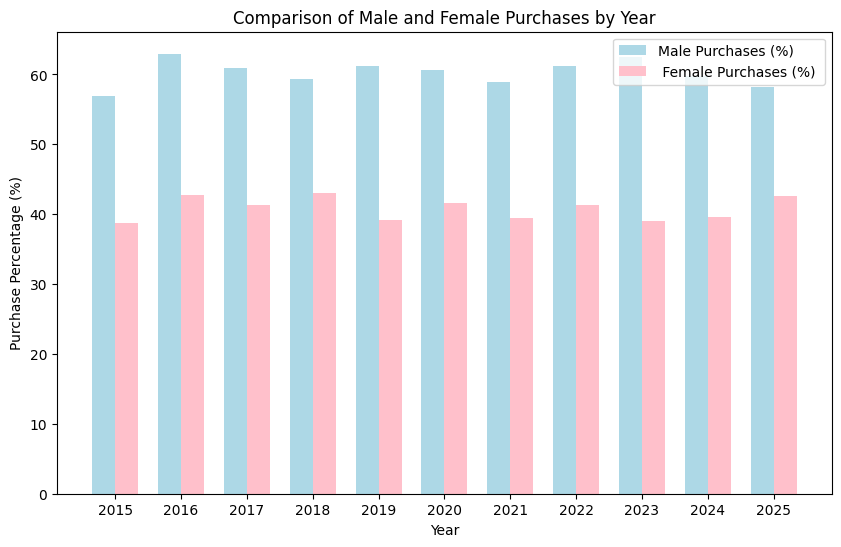

In [ ]:

# Regrouper les données par année et calculer la moyenne des pourcentages
grouped_data = df.groupby('Year')[['Male Purchases (%)', ' Female Purchases (%) ']].mean().reset_index()

# Création du graphique
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = grouped_data['Year']

plt.bar(index - bar_width/2, grouped_data['Male Purchases (%)'], bar_width, label='Male Purchases (%)', color='lightblue')
plt.bar(index + bar_width/2, grouped_data[' Female Purchases (%) '], bar_width, label=' Female Purchases (%) ', color='pink')

# Ajout des labels et titre
plt.xlabel('Year')
plt.ylabel('Purchase Percentage (%)')
plt.title('Comparison of Male and Female Purchases by Year')
plt.xticks(index)
plt.legend()

# Affichage du graphique
plt.show()


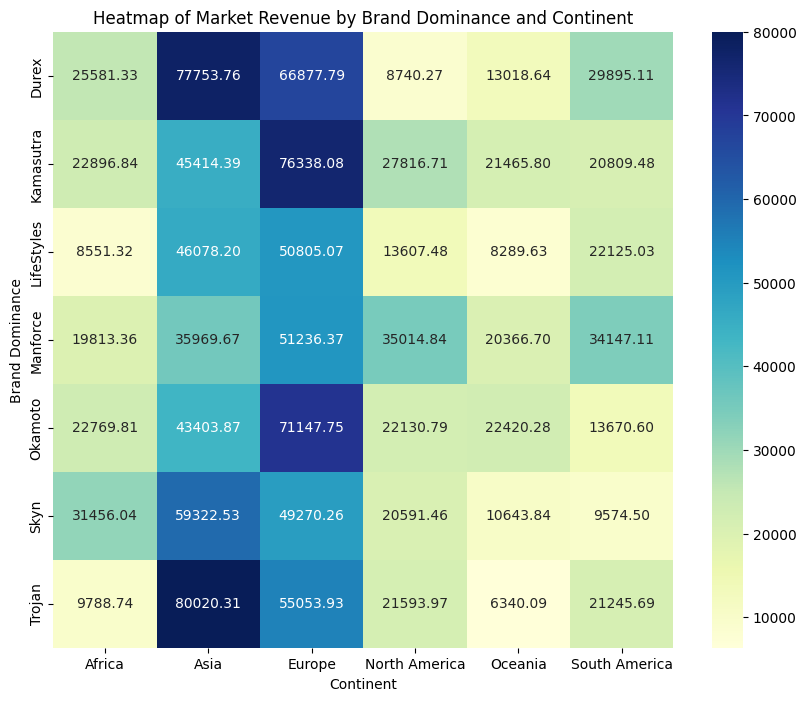

In [ ]:
# Pivot the dataframe to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='Brand Dominance', columns='Continent', values='Market Revenue (Million USD)', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Market Revenue (Million USD)'})

# Add labels and title
plt.title('Heatmap of Market Revenue by Brand Dominance and Continent')
plt.xlabel('Continent')
plt.ylabel('Brand Dominance')

# Show the heatmap
plt.show()